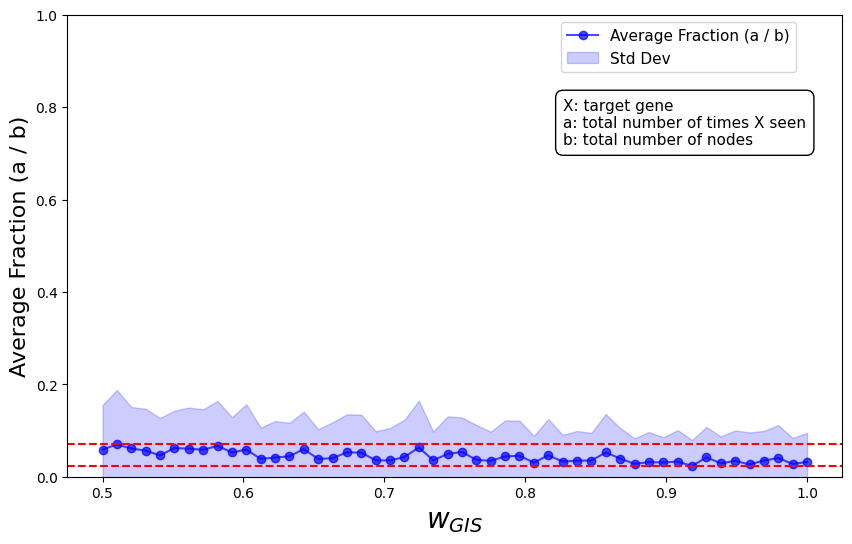

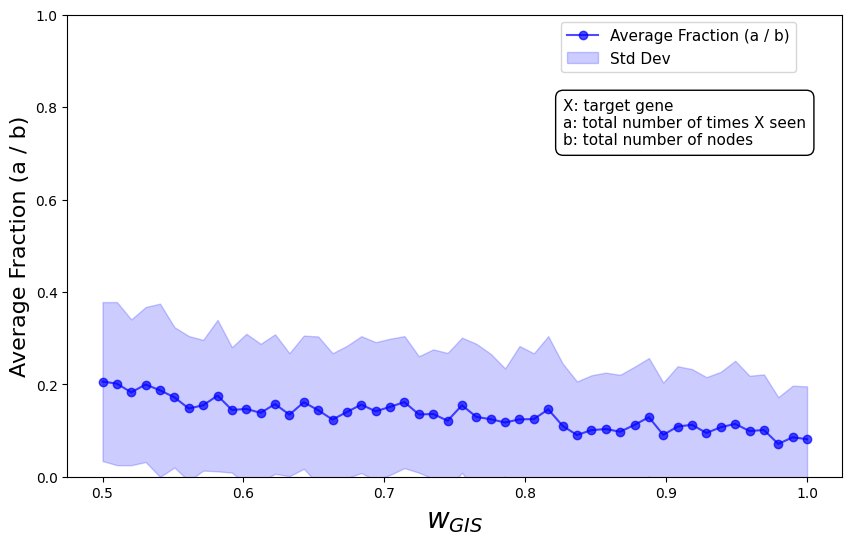

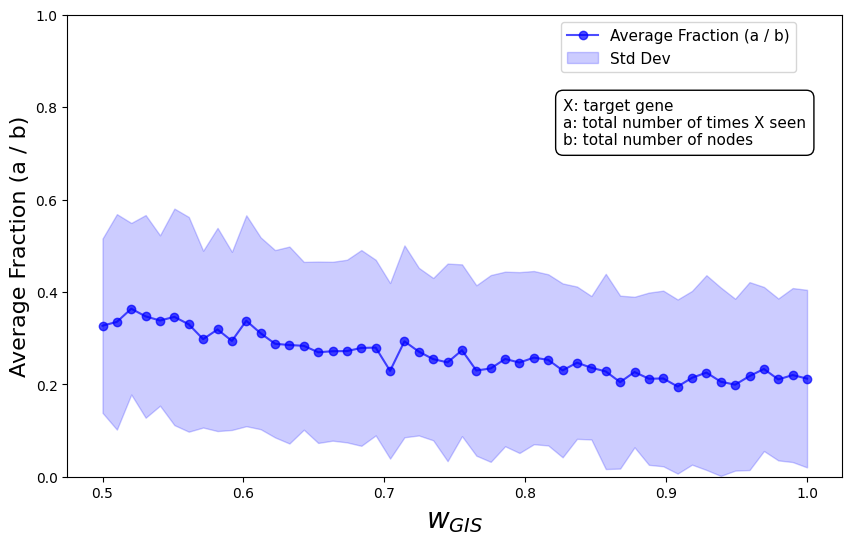

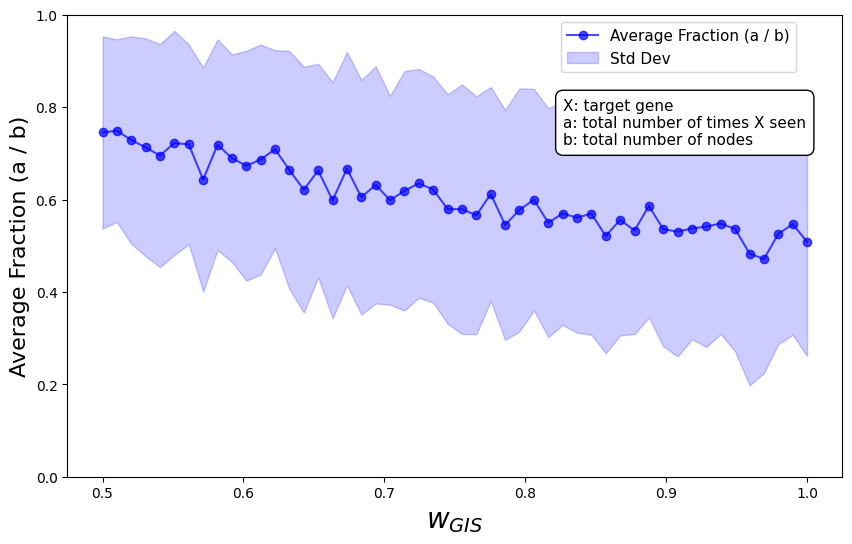

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import numpy as np

dire = "/home/mongardi/tree-based-models/Biology-informed_sklearn/src"
dire_results = os.path.join(dire, 'sensitivity_analysis/sens_an_FS1/plots')

if not os.path.exists(dire_results):
    os.makedirs(dire_results)

def parse_last_line_per_gis(file_path):
    gis_values = []
    a_b_ratios = []
    current_gis = None
    last_a_b = None

    with open(file_path, 'r') as file:
        for line in file:
            if "GIS[0] =" in line:
                if current_gis is not None and last_a_b is not None:
                    gis_values.append(current_gis)
                    a_b_ratios.append(last_a_b)
                current_gis = float(re.search(r"GIS\[0\] =\s+([\d.]+)", line).group(1))
                last_a_b = None
            elif "Gene" in line and "has been seen" in line:
                a_b = re.search(r"seen (\d+) over (\d+)", line)
                if a_b:
                    last_a_b = int(a_b.group(1)) / int(a_b.group(2))

    if current_gis is not None and last_a_b is not None:
        gis_values.append(current_gis)
        a_b_ratios.append(last_a_b)

    df = pd.DataFrame({"GIS[0]": gis_values, "a/b": a_b_ratios})
    grouped = df.groupby("GIS[0]", as_index=False).agg(mean=('a/b', 'mean'), std=('a/b', 'std'))
    grouped.rename(columns={'mean': 'a/b', 'std': 'a/b_std'}, inplace=True)
    return grouped


def plot_data_with_std(data, max_features):
    plt.figure(figsize=(10, 6))
    
 
    mean = data['a/b']
    std = data['a/b_std']

    # Plot the lines
    plt.plot(data['GIS[0]'], mean, color='blue', marker='o', label='Average Fraction (a / b)', alpha=0.7)

    # Fill between the lines
    plt.fill_between(data['GIS[0]'], mean - std, mean + std, color='blue', alpha=0.2, label='Std Dev')


    plt.xlabel('$w_{GIS}$', fontsize=20)
    plt.ylabel("Average Fraction (a / b)", fontsize=16)

    plt.ylim(0, 1)


    plt.legend(loc="upper right", bbox_to_anchor=(0.95, 1), fontsize=11)
    plt.text(0.64, 0.82, "X: target gene\na: total number of times X seen\nb: total number of nodes", 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), 
             ha='left', va='top', fontsize=11)
    #plt.show()
    
    if max_features == "sqrt":
        plt.axhline(y=np.min(mean), color='r', linestyle='--')
        plt.axhline(y=np.max(mean), color='r', linestyle='--')
    plt.savefig(os.path.join(dire_results,f"{max_features}.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)


file_path_sqrt = 'sensitivity_feature_selection_count_maxfsqrt.txt'
file_path_100 = 'sensitivity_feature_selection_count_maxf100.txt'
file_path_200 = 'sensitivity_feature_selection_count_maxf200.txt'
file_path_500 = 'sensitivity_feature_selection_count_maxf500.txt'


data_sqrt_averaged = parse_last_line_per_gis(file_path_sqrt)
plot_data_with_std(data_sqrt_averaged, "sqrt")

data_100_averaged = parse_last_line_per_gis(file_path_100)
plot_data_with_std(data_100_averaged, 100)

data_200_averaged = parse_last_line_per_gis(file_path_200)
plot_data_with_std(data_200_averaged, 200)

data_500_averaged = parse_last_line_per_gis(file_path_500)
plot_data_with_std(data_500_averaged, 500)

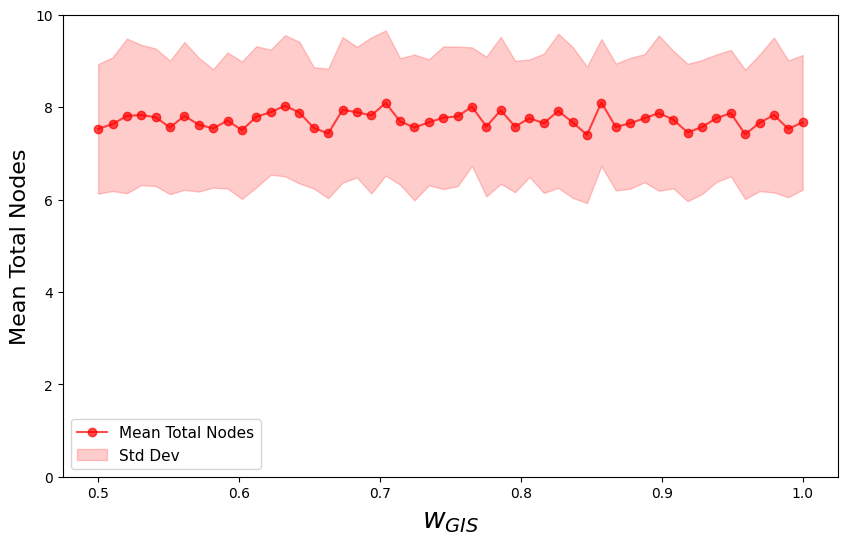

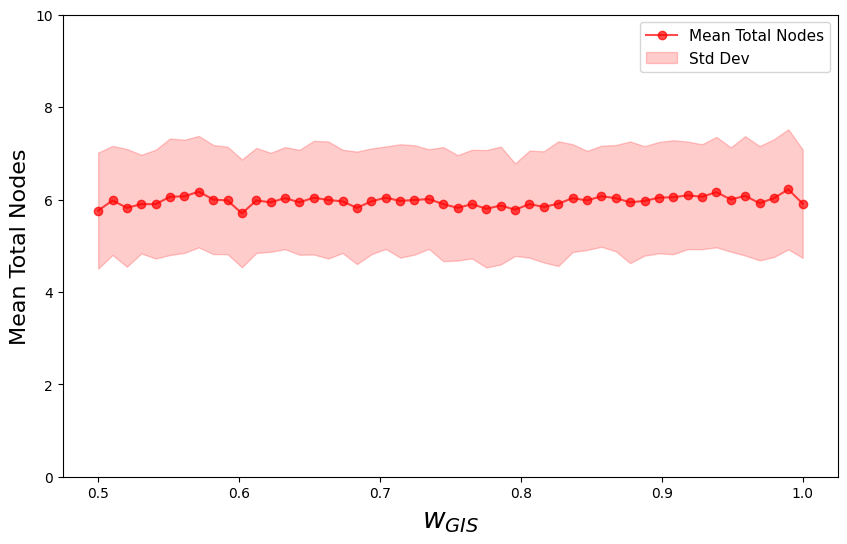

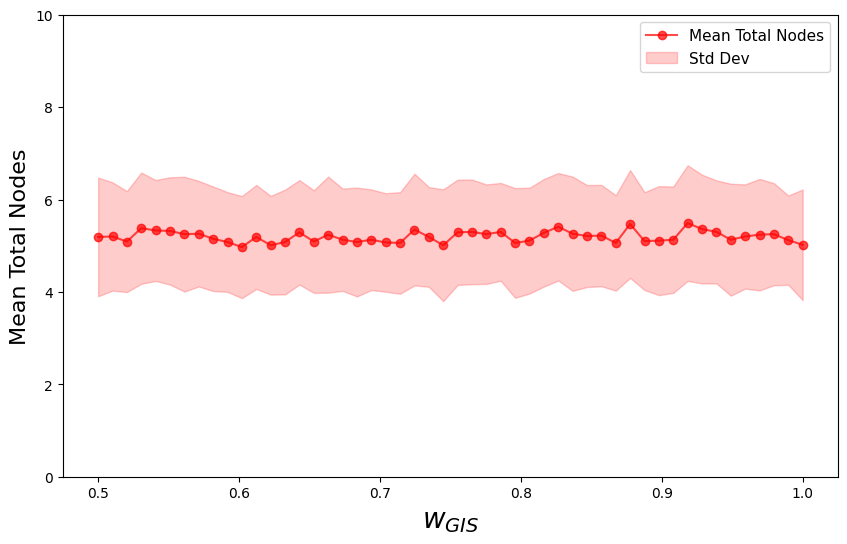

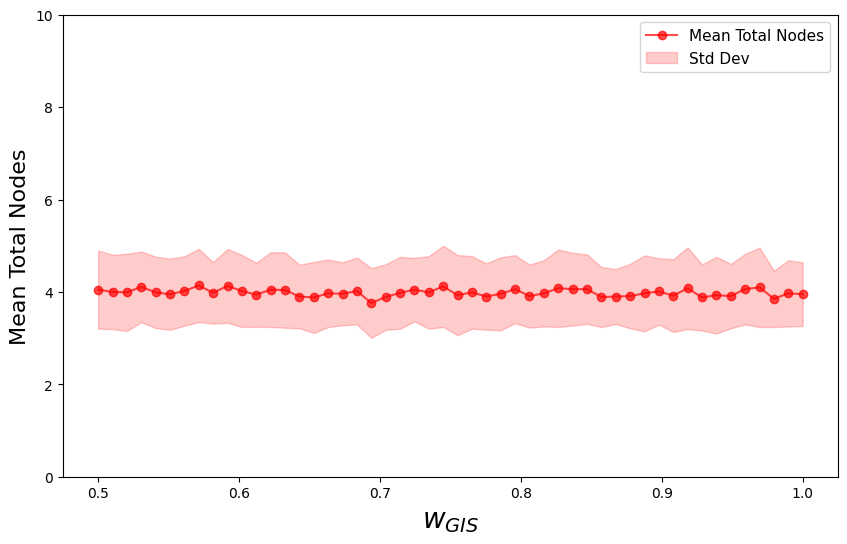

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re


def parse_total_nodes(file_path):
    gis_values = []
    total_nodes_values = []
    current_gis = None
    last_total_nodes = None

    with open(file_path, 'r') as file:
        for line in file:
            if "GIS[0] =" in line:
                
                if current_gis is not None and last_total_nodes is not None:
                    gis_values.append(current_gis)
                    total_nodes_values.append(last_total_nodes)
  
                current_gis = float(re.search(r"GIS\[0\] =\s+([\d.]+)", line).group(1))
                last_total_nodes = None
            elif "Gene" in line and "has been seen" in line:
                total_nodes = re.search(r"over (\d+) nodes", line)
                if total_nodes:
                    last_total_nodes = int(total_nodes.group(1))


    if current_gis is not None and last_total_nodes is not None:
        gis_values.append(current_gis)
        total_nodes_values.append(last_total_nodes)

    df = pd.DataFrame({"GIS[0]": gis_values, "Total Nodes": total_nodes_values})
    

    min_nodes = df["Total Nodes"].min()
    max_nodes = df["Total Nodes"].max()
    
    averaged_df = df.groupby("GIS[0]", as_index=False)["Total Nodes"].mean()
    std = df.groupby("GIS[0]", as_index=False)["Total Nodes"].std()
    return averaged_df, min_nodes, max_nodes, std 


def plot_total_nodes(data, max_features, min_nodes, max_nodes, std):
    

    plt.figure(figsize=(10, 6))
    plt.plot(data['GIS[0]'], data['Total Nodes'], color='red', marker='o', label='Mean Total Nodes', alpha=0.7)


    plt.fill_between(data['GIS[0]'], data['Total Nodes'] - std['Total Nodes'], data['Total Nodes'] +  std['Total Nodes'], color='red', alpha=0.2, label='Std Dev')

    plt.xlabel("$w_{GIS}$", fontsize=20)
    
    plt.ylabel("Mean Total Nodes", fontsize=16)
    #plt.ylim(min_nodes, max_nodes) 
    plt.ylim(0, 10.0)
    plt.legend(fontsize=11)
   #plt.show()

    plt.savefig(os.path.join(dire_results,f"node_{max_features}.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)


file_path_sqrt = 'sensitivity_feature_selection_count_maxfsqrt.txt'
file_path_100 = 'sensitivity_feature_selection_count_maxf100.txt'
file_path_200 = 'sensitivity_feature_selection_count_maxf200.txt'
file_path_500 = 'sensitivity_feature_selection_count_maxf500.txt'

data_sqrt_total_nodes, min_nodes_sqrt, max_nodes_sqrt, std = parse_total_nodes(file_path_sqrt)
plot_total_nodes(data_sqrt_total_nodes, "sqrt", min_nodes_sqrt, max_nodes_sqrt, std)

data_100_total_nodes, min_nodes_100, max_nodes_100, std = parse_total_nodes(file_path_100)
plot_total_nodes(data_100_total_nodes, 100, min_nodes_100, max_nodes_100, std)

data_200_total_nodes, min_nodes_200, max_nodes_200, std = parse_total_nodes(file_path_200)
plot_total_nodes(data_200_total_nodes, 200, min_nodes_200, max_nodes_200, std)

data_500_total_nodes, min_nodes_500, max_nodes_500, std = parse_total_nodes(file_path_500)
plot_total_nodes(data_500_total_nodes, 500, min_nodes_500, max_nodes_500, std)
